# Introduction to Image and Video Processing - 1st Project
## Spencer Matei Olson - i6260490

In [96]:
# Importing necessary libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

# Custom function to display images nicely using pyplot
def show_images(*images):
    plt.figure()
    if len(images) == 1:
        plt.axis('off')
        plt.imshow(images[0], vmin=0, vmax=255, cmap='gray')
    else:
        f, axarr = plt.subplots(1, len(images))

        for i, a in zip(images, axarr):
            a.axis('off')
            a.imshow(i, vmin=0, vmax=255, cmap='gray')


## Exercise 1
1 - In this first exercise, I simply used OpenCV's built-in function to convert the RGB image to HSV (cv.cvtColor()). 

If you look at the resulting image, you can see that there are a lot of blues visible. When converting RGB to HSV, the Blue-channel is converted into the Value-channel, therefore, a large amount of blue pixels indicates that the value of the image is relatively high (the image is bright). Looking at the parrots head, this portion of the image is very green. The Green-channel corresponds to the Saturation of the image. Because the color of the birds' feathers are very 'colorful' or saturated, this is what we would expect.

The second image is similar. In the original image of the stone tiles, we notice that the colors are very pale and greyed-out. This corresponds to an HSV image that has a lot of blue but very little green in it!

Images chosen for this exercise:


<Figure size 1440x720 with 0 Axes>

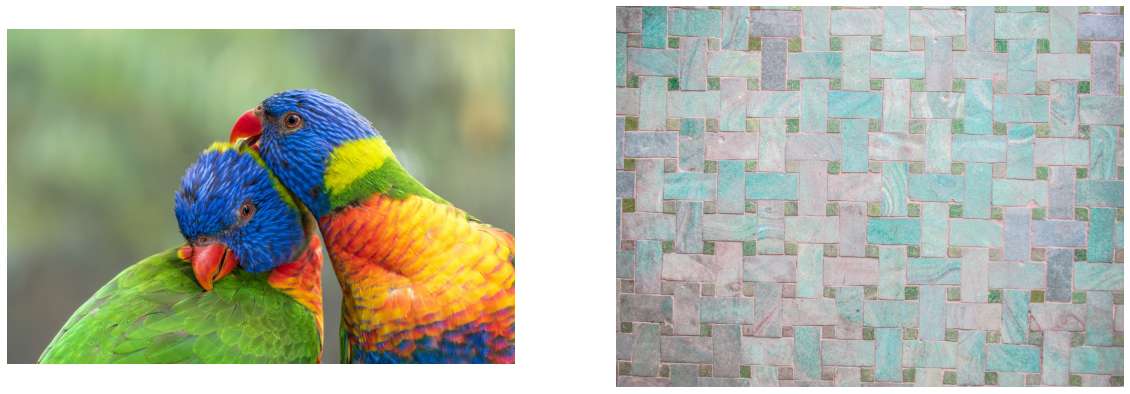

<Figure size 1440x720 with 0 Axes>

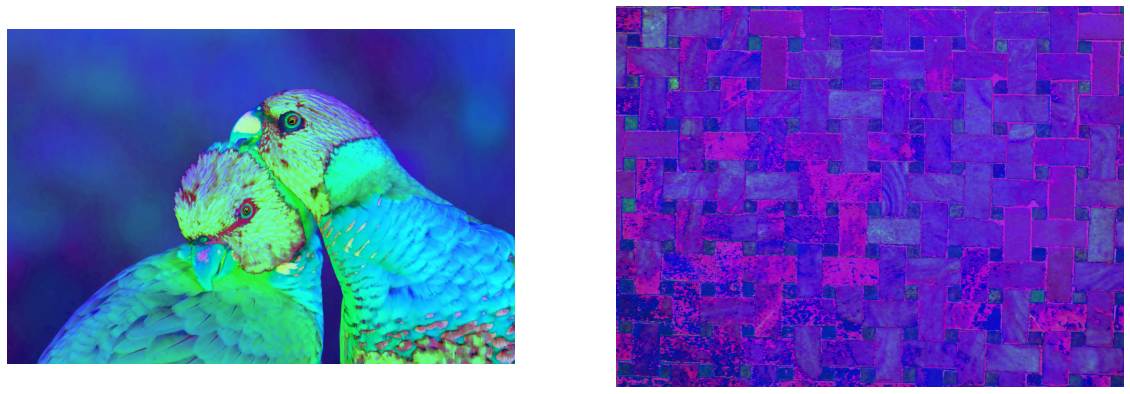

In [97]:
# Loading and converting images from BGR to RGB
birds = cv.imread('./img/birds.jpg')
birds = cv.cvtColor(birds, cv.COLOR_BGR2RGB)
stone = cv.imread('./img/stone.jpg')
stone = cv.cvtColor(stone, cv.COLOR_BGR2RGB)

# Conversion of RGB to HSV image
birds_converted = cv.cvtColor(birds, cv.COLOR_RGB2HSV)
stone_converted = cv.cvtColor(stone, cv.COLOR_RGB2HSV)

print("Images chosen for this exercise:")
show_images(birds, stone)
show_images(birds_converted, stone_converted)

2 - In the second exercise, I used simple NumPy aggegrate functions to calculate the Intensities and Values of the two images. To calculate the Intensities, I take the average/mean of the three color channels. To calculate the Values, I take the largest value of the three color channels per pixel. This results in the following greyscale images.

Images are (from left to right): original, 'I' image, 'V' image


<Figure size 1440x720 with 0 Axes>

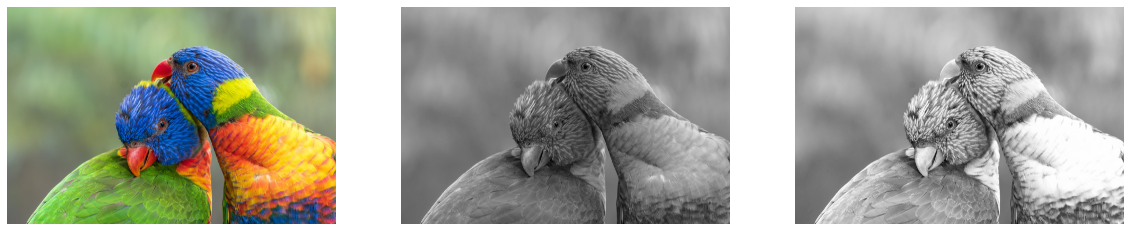

<Figure size 1440x720 with 0 Axes>

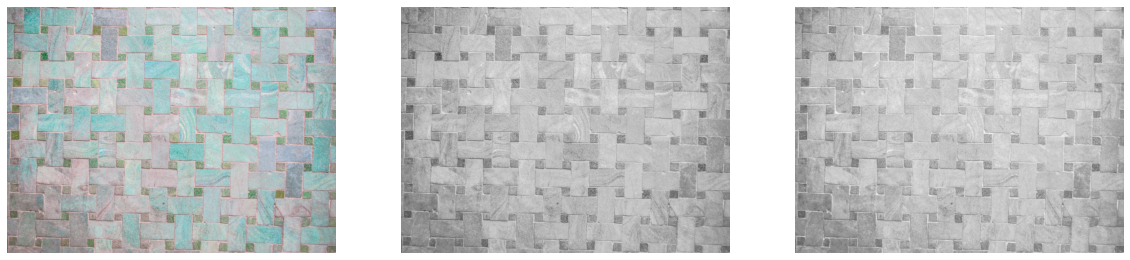

In [98]:
hsi_birds = birds.mean(axis=2)
hsv_birds = birds.max(axis=2)

hsi_stone = stone.mean(axis=2)
hsv_stone = stone.max(axis=2)

print("Images are (from left to right): original, 'I' image, 'V' image")
show_images(birds, hsi_birds, hsv_birds)
show_images(stone, hsi_stone, hsv_stone)

## Exercise 2

1 - For the first part of this exercise, I chose two images that were given. One low contrast and one high contrast. Below the images you may see their corresponding histograms. 

What we can notice is that the histogram of the low contrast image is concentrated in one spot in the 0-255 range of greys. Looking at the histogram of the second images, you can see that a majority of greyscale values fall on the very ends of the 0-255 range, meaning that there are a lot of very dark and very bright values. 

These two observations support the idea that the first image is low contrast and the second image is high contrast!

2 - Transforming both images using the negative-pointwise transformation, results in an inverted image. So pixels with values x will become 255-x, therefore resulting in dark pixels becoming light and vice versa. You can see those images below the original ones. 

3 - If we take a look at the histograms of these 'inverted' images, in essence, the values of the histogram will be flipped around the midpoint of the x-axis, resulting in the histograms you see below. Because of this, the contrast of the images should not change by applying a negative point-wise transformation!

Original images and their corresponding histograms
"Inverted" images and their corresponding histograms


<Figure size 1440x720 with 0 Axes>

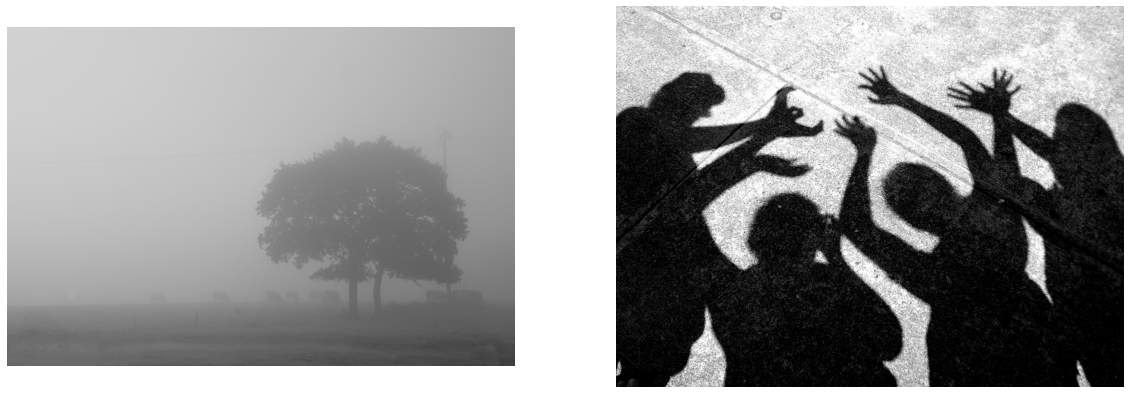

<Figure size 1440x720 with 0 Axes>

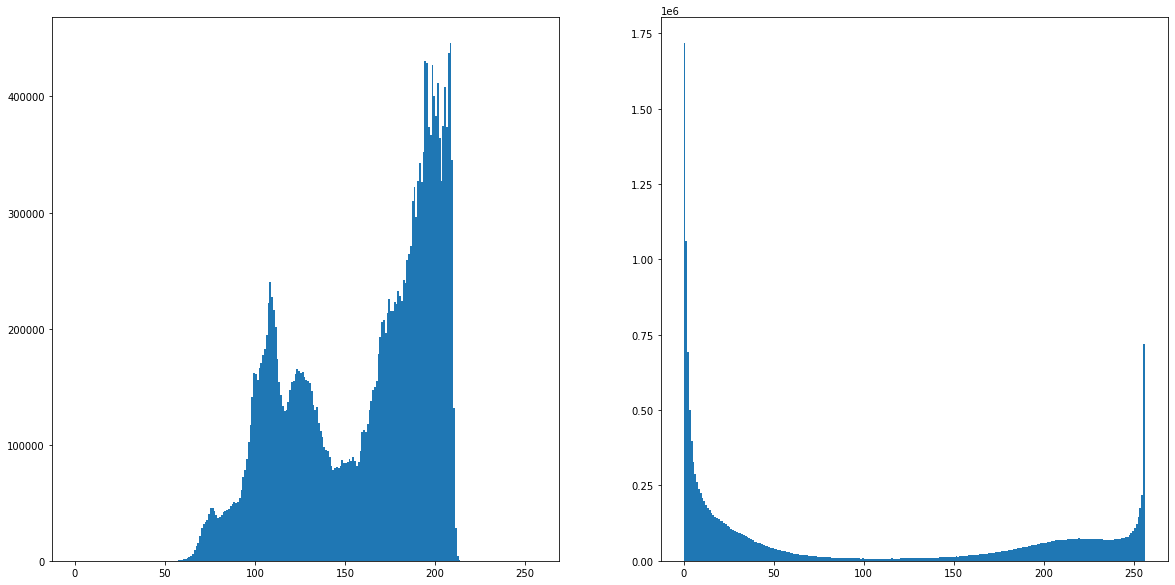

<Figure size 1440x720 with 0 Axes>

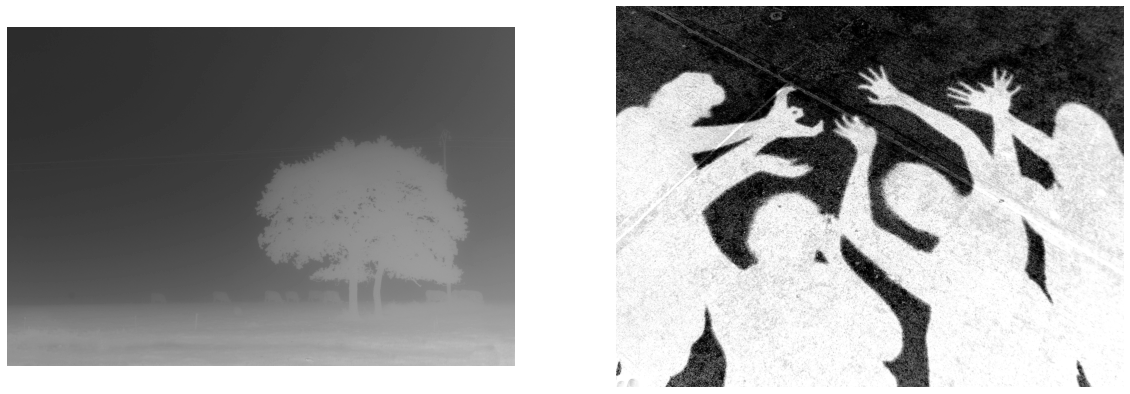

<Figure size 1440x720 with 0 Axes>

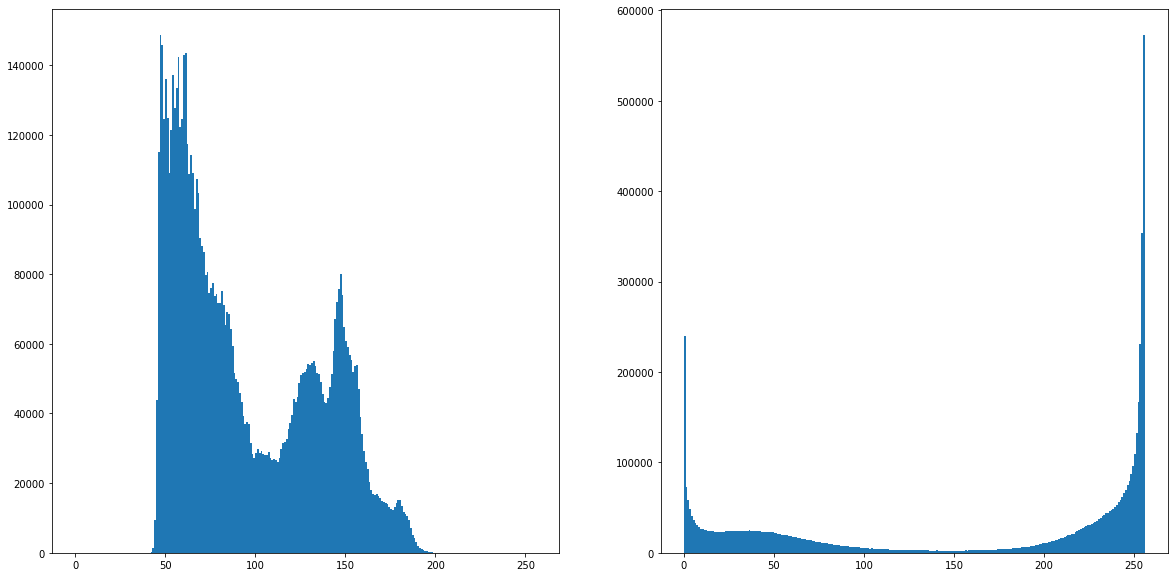

In [99]:
# Loading and converting images from BGR to RGB
fog = cv.imread('./img/fog.jpg')
fog = cv.cvtColor(fog, cv.COLOR_BGR2RGB)
shadows = cv.imread('./img/shadows.jpg')
shadows = cv.cvtColor(shadows, cv.COLOR_BGR2RGB)

print('Original images and their corresponding histograms')
show_images(fog, shadows)

# Plotting histograms for images
plt.figure()
_, (a1, a2) = plt.subplots(1, 2)
a1.hist(fog.ravel(), 256, [0, 256])
a2.hist(shadows.ravel(), 256, [0, 256])

# Use negative point-wise transform
#   (I'm choosing to only use one channel because the images are greyscale and therefore it's irrelevant which channel we consider)
neg_fog = 255-fog[:, :, 0]
neg_shadows = 255-shadows[:, :, 0]

print('"Inverted" images and their corresponding histograms')
show_images(neg_fog, neg_shadows)

# Plotting histograms of negative images
plt.figure()
_, (a1, a2) = plt.subplots(1, 2)
a1.hist(neg_fog.ravel(), 256, [0, 256])
a2.hist(neg_shadows.ravel(), 256, [0, 256])

plt.show()


4 - For this exercise, I chose to modify the high-contrast image using the power-rule point-wise transform. To turn this image into a low contrast, I use the power-rule transform with n < 1, where s = r^n. This is to increase the values of the low-valued pixels significantly, while leaving the high-valued pixels relatively unchanged. After performing the transform, I normalize the image back to the range of 0-255.

As we can see in the resulting histogram, what this transformation does is concentrate the values of the pixels on the higher end of the 0-255 range. From our observations in the previous exercise, we know that when the histogram of an image is concentrated into one range, then the corresponding image appears to have low contrast.

We can see in the images below, that this observation seems to be correct!

<Figure size 1440x720 with 0 Axes>

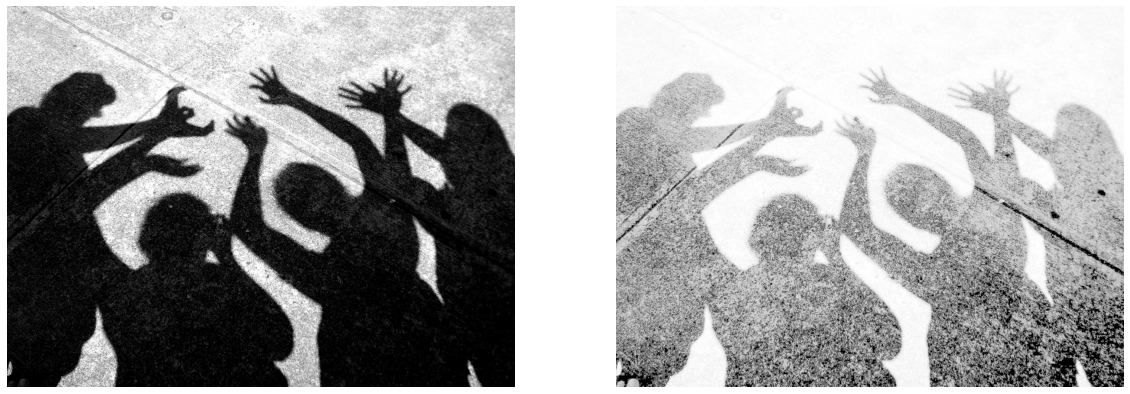

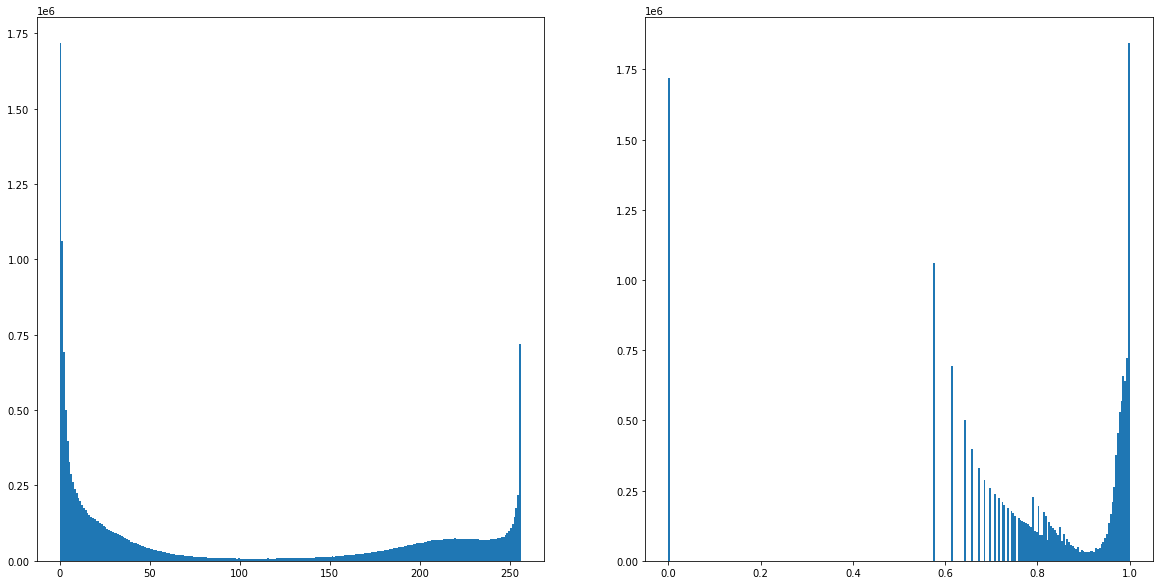

<Figure size 1440x720 with 0 Axes>

In [100]:
# Use power-rule point-wise transform
pow_shadows = shadows.copy()
n = 0.1

# Applying power rule, then converting to 0-1 range
pow_shadows = (shadows**n)/255
# Normalizing image
pow_shadows = pow_shadows*(1/np.max(pow_shadows))
show_images(shadows, pow_shadows)

# Plotting histograms of power-rule images
f, (a1, a2) = plt.subplots(1, 2)
plt.figure()
a1.hist(shadows.ravel(), 256, [0, 256])
a2.hist(pow_shadows.ravel(), 256, [0, 1])

plt.show()

## Exercise 3

1 - For this exercise, I chose the thin petal-ed flower to demonstrate what converting an image to polar coordinates look like. 

To achieve this conversion, I used one of opencv-s built-in functions, warpPolar(). For this transformation, I tell the function to use the center of the image as the 0-radius point, then I take the height of the image as the max-radius. 

The function then returns an image where the horizontal axis corresponds to the radius of a pixel, and the vertical axis corresponds to the angle of a pixel. Because the flower is nicely centered in the image, the center of the flower is converting into a rectangle along the vertical-axis and radiating petals line-up perpendicular to the center of the flower.

Note: the image returned by warpPolar seems to have a vertical-axis that ranges from 0 (at the top) to -360 (at the bottom).

<Figure size 1440x720 with 0 Axes>

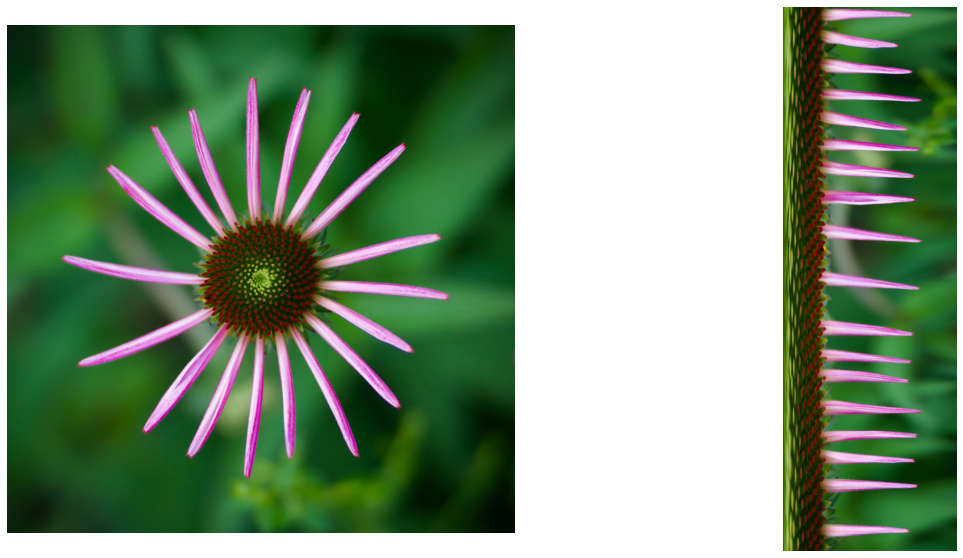

In [101]:
flower = cv.cvtColor(cv.imread('img/flower.jpeg'), cv.COLOR_BGR2RGB)

flower_polar = cv.warpPolar(flower, (0, 0), (flower.shape[1]/2, flower.shape[0]/2), flower.shape[0]/2, None)

show_images(flower, flower_polar)

2 - For the second exercise, I chose a different flower than the first one. To demonstrate the cartoonification of an image, I choose a flower with 'fuller' shapes to demonstrate the monotonic colors inside the black borders better. 

My approach of cartoonification involves several steps. In broad terms, I first manually quantize the image into 3 bins per color channel. 

After quantizing, I use the built-in Canny() function to detect the edges of the quantized image. This function returns a black image where white values indicate edges in the image. To get larger and more defined lines, I blur (using built-in kernel blur) then quantize this image to either 0 or 255 to ensure that all pixels are either black or white. 

I then set all pixels in the quantized image to black wherever white pixels appear in the edge-detection image.

After some experimenting, I found that I also received cleaner quantized images if I blurred the original image beforehand

<Figure size 1440x720 with 0 Axes>

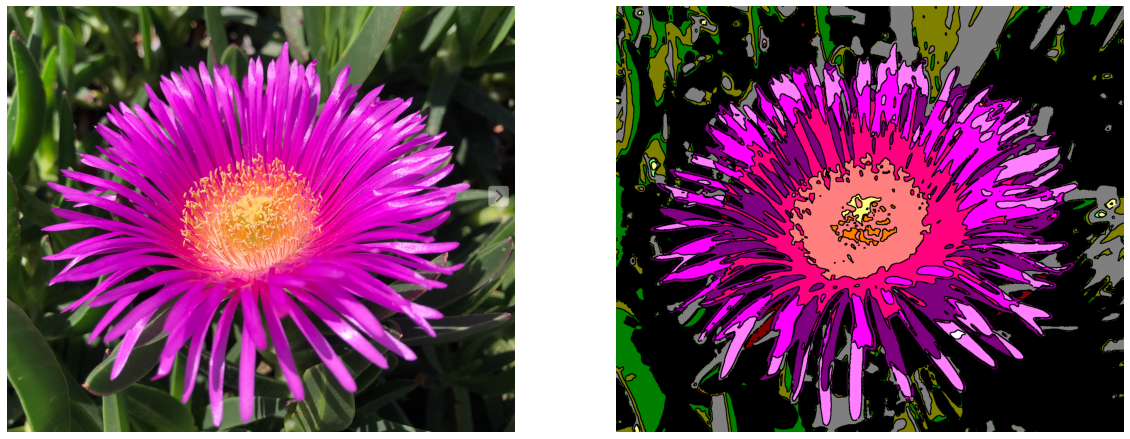

<Figure size 1440x720 with 0 Axes>

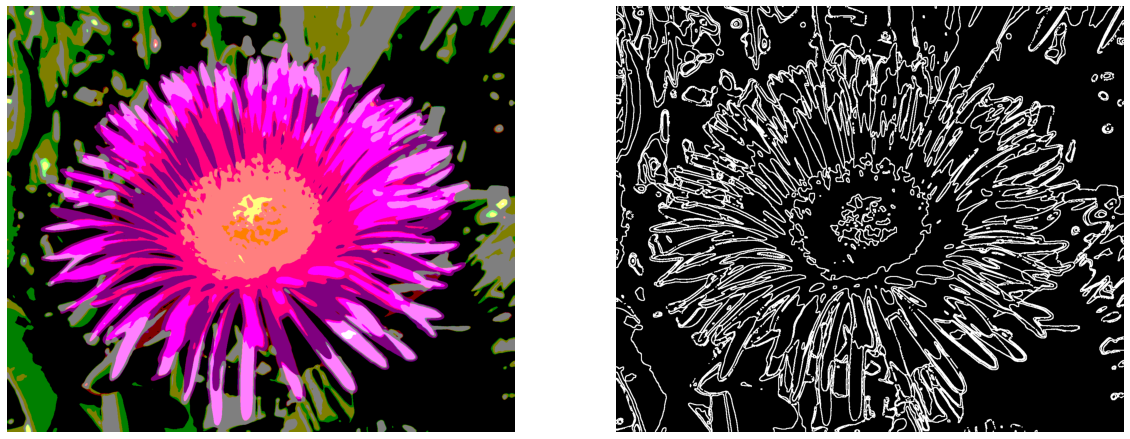

In [102]:
pink = cv.cvtColor(cv.imread('./img/pink.jpg'), cv.COLOR_BGR2RGB)

# Cartoonifying flower

# Blur original image
pink_blur = cv.blur(pink, ksize=(11, 11))

# Quantize image
n = 2.0
quant = (np.round(pink_blur*n/255)*(255/n)).astype(np.uint8)

# Get edges of quantized image, then blur them
pink_edges = cv.Canny(quant, 200, 200)
pink_edges = cv.GaussianBlur(pink_edges, ksize=(3, 3), sigmaX=1, sigmaY=1)
# Quantize edges
pink_edges[pink_edges > 0] = 255

quant_copy = quant.copy()
# Set all pixels that are white in edges to black on quantized image
quant[pink_edges == 255] = 0

# Original image and Cartoonified image
show_images(pink,quant)

# Quantized image without edges, edges after blurring and quantizing
show_images(quant_copy,pink_edges)

## Exercise 4

In this exercise, I chose to use the thin-petal-ed flower image because it has very distinct edges which can indicate the direction of value changes. 

<Figure size 1440x720 with 0 Axes>

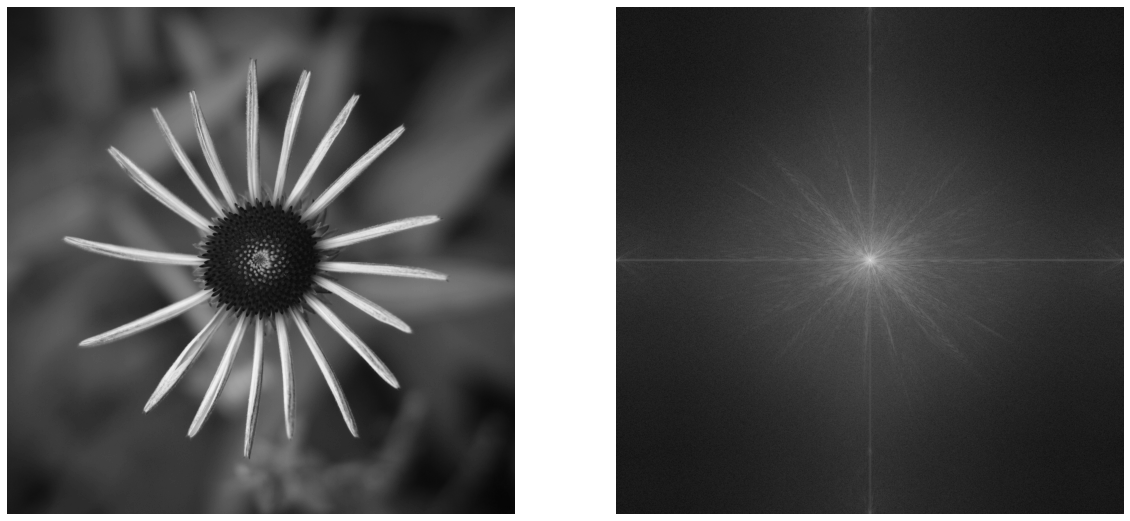

<Figure size 1440x720 with 0 Axes>

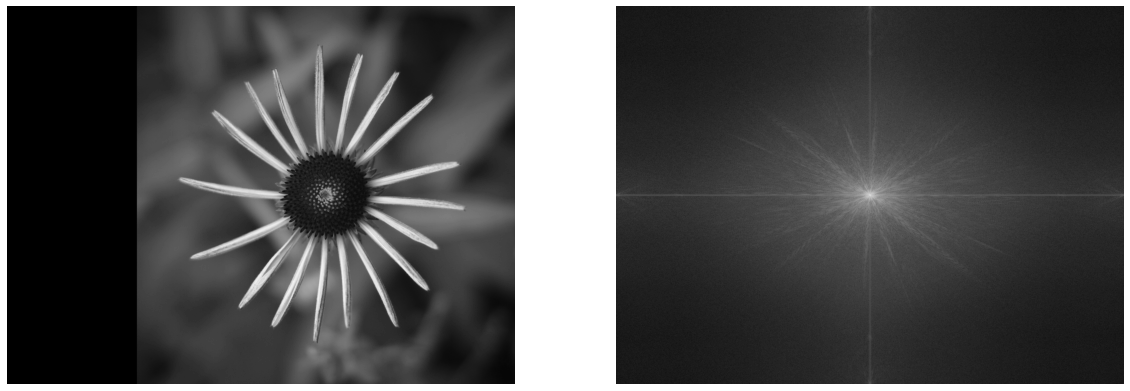

In [103]:
# Loading image
flower = cv.imread('./img/flower.jpeg')
flower = cv.cvtColor(flower, cv.COLOR_RGB2GRAY)

# Shifting image to the right by 1000 pixels by shifting it to the right
shift = 1000
flower_trans = np.insert(flower, 0, np.zeros((shift, flower.shape[0])), axis=1)

# Custom function to get fft and its magnitude of an image
def getFFT(image):
    image = image/255
    comp = np.fft.fftshift(np.fft.fft2(image))
    magnitude = np.log(abs(comp))
    return comp, magnitude

# Get magnitudes of the Fourier transforms
_, fft_tower = getFFT(flower)
_, fft_tower_rot = getFFT(flower_trans)

show_images(flower, fft_tower*20)
show_images(flower_trans, fft_tower_rot*20)

## Exercise 5

<Figure size 1440x720 with 0 Axes>

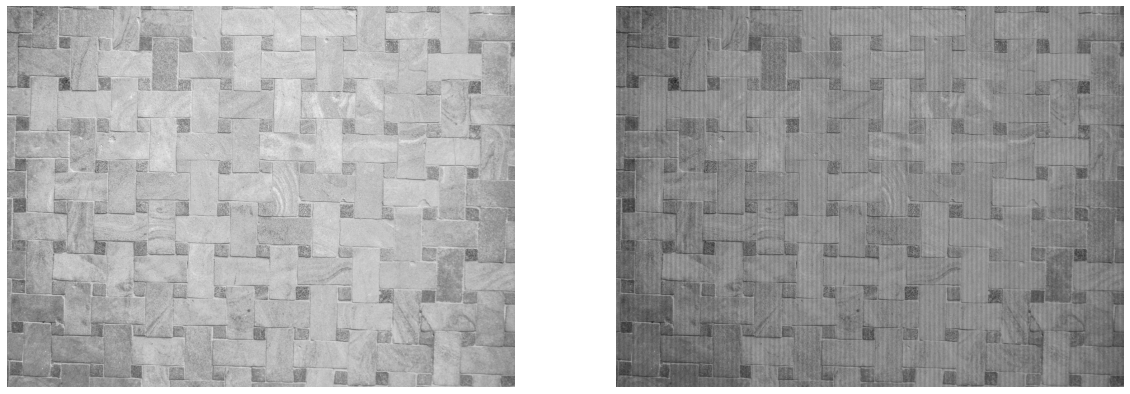

<Figure size 1440x720 with 0 Axes>

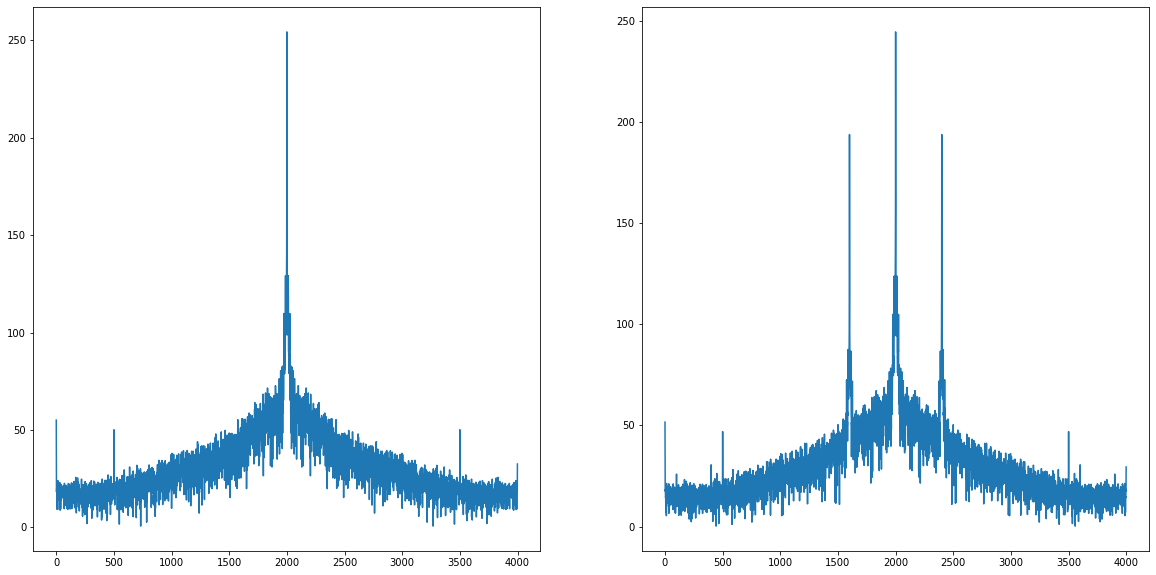

<Figure size 1440x720 with 0 Axes>

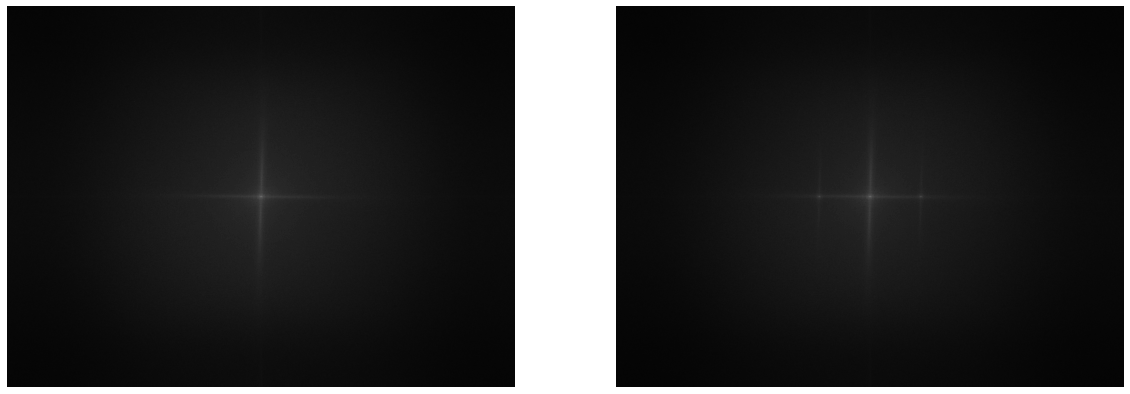

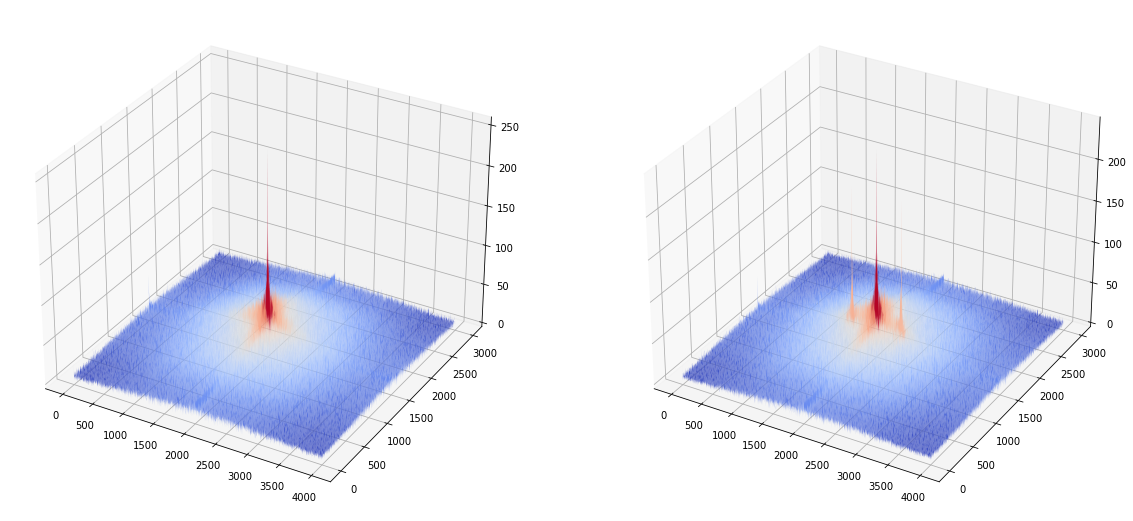

In [104]:
shadows = cv.cvtColor(cv.imread('./img/stone.jpg'), cv.COLOR_BGR2GRAY).astype(np.uint32)

angle = 0
wavelength = 10

x = np.arange(0, shadows.shape[1], 1)
y = np.arange(0, shadows.shape[0], 1)
X, Y = np.meshgrid(x, y)

magnitude = 0.5
noise = np.sin(
    (2*np.pi*X/wavelength)
)*magnitude/2+(1-magnitude/2)

noisy_image = np.multiply(noise, shadows)
noisy_image = noisy_image - np.min(noisy_image)
noisy_image = noisy_image*255/np.max(noisy_image)

show_images(shadows, noisy_image)

comp_fft, fft = getFFT(shadows)
comp_noisy, noisy_fft = getFFT(noisy_image)
orig_power = fft**2
noisy_power = noisy_fft**2

# 1D power spectra
plt.figure()
orig_power_slice = orig_power[int(shadows.shape[0]/2), :]
noisy_power_slice = noisy_power[int(shadows.shape[0]/2), :]
_, (a1, a2) = plt.subplots(1, 2)
a1.plot(orig_power_slice)
a2.plot(noisy_power_slice)

# 2D power spectra
show_images(orig_power, noisy_power)

# 3D power spectra
f = plt.figure()
a1 = f.add_subplot(1, 2, 1, projection='3d')
a1.plot_surface(X, Y, orig_power, linewidth=0, cmap=plt.cm.coolwarm)
a2 = f.add_subplot(1, 2, 2, projection='3d')
a2.plot_surface(X, Y, noisy_power, linewidth=0, cmap=plt.cm.coolwarm)


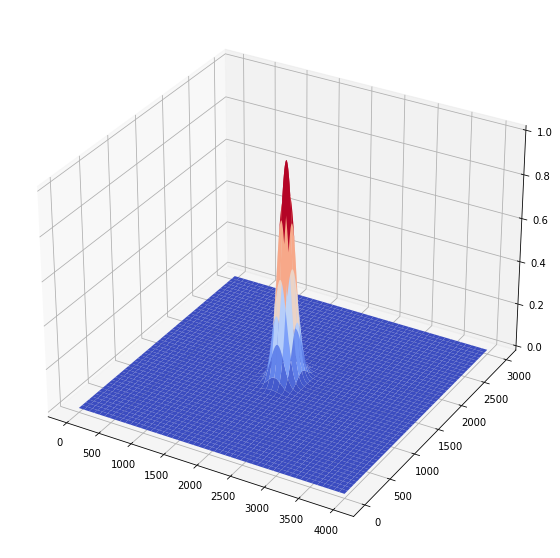

In [105]:
# Creating LPF to filter out our high-frequency noise
# Setting sigma to 100, so that the peaks in the power spectrum are not included
sigma = 100
h = np.exp(-(np.sqrt((X-shadows.shape[1]/2)**2 + (Y-shadows.shape[0]/2)**2)**2)/2/sigma/sigma)

# Diplaying the filter
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, h, linewidth=0, cmap=plt.cm.coolwarm)


<Figure size 1440x720 with 0 Axes>

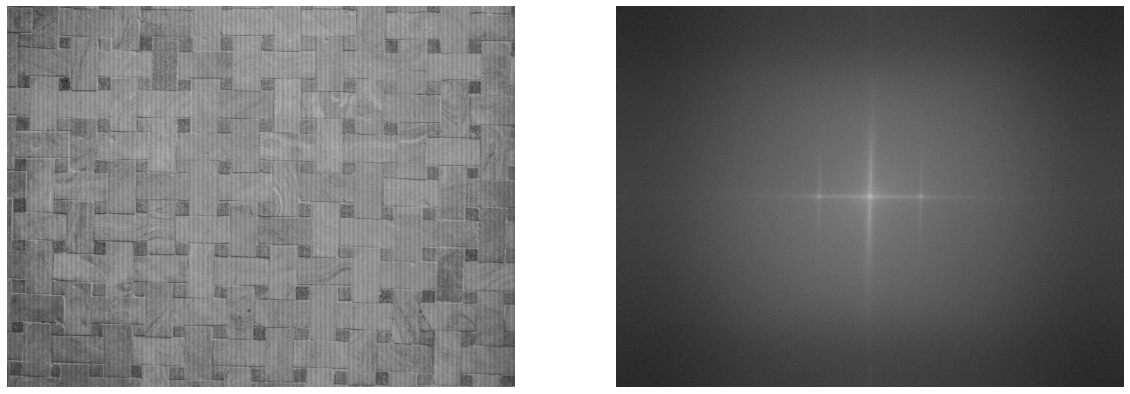

<Figure size 1440x720 with 0 Axes>

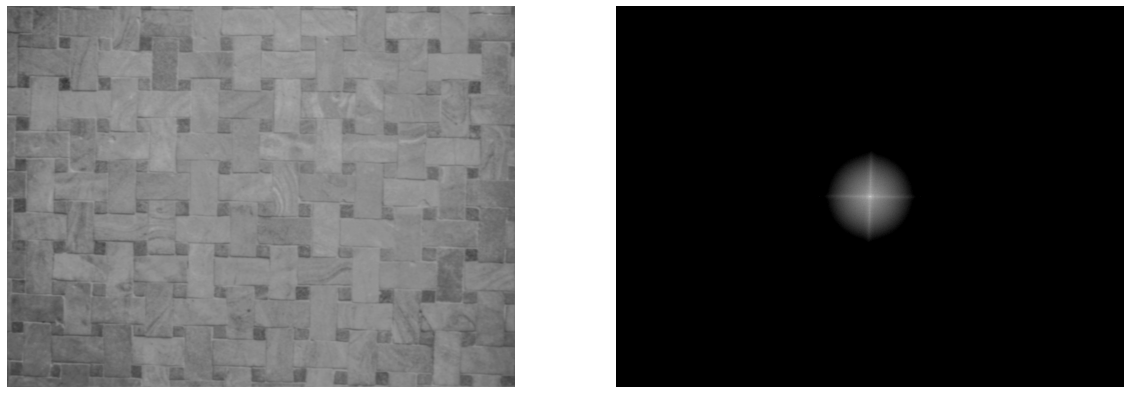

In [108]:
# Multiplying fft of noisy image with our LPF results
comp_clean = np.multiply(comp_noisy,h)
cleaned = abs(np.fft.ifft2(np.fft.ifftshift(comp_clean)))*255

# Displaying noisy image with their corresponding fft-magnitudes
show_images(noisy_image, noisy_fft*20)
show_images(cleaned, 20*np.log(abs(comp_clean)))